# Chapter 21: Neural Networks

## 21.1: Using Autograd with PyTorch

In [3]:
# use PyTorch's autograd features to compute and store the gradients after undergoing forward and backward propagation.

# Import libraries
import torch

# Create a torch tensor that requires gradients
t = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
t

tensor([1., 2., 3.], requires_grad=True)

In [5]:
# Perform a tensor operation simulating "forward propagation"
tensor_sum = t.sum()
tensor_sum

tensor(6., grad_fn=<SumBackward0>)

In [13]:
# Perform back propagation
tensor_sum.backward()

In [12]:
# View gradients
t.grad

tensor([1., 1., 1.])

## 21.2 Preprocessing Data for Neural Networks

In [18]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 25.1 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [19]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [20]:
# Create feature
features = np.array([[-100.1, 3240.1],
                    [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1],
                    ])

In [21]:
# Create scaler
scaler = preprocessing.StandardScaler()

In [22]:
# Convert to a tensor
features_standardized_tensor = torch.from_numpy(features)

In [23]:
# Show features
features_standardized_tensor

tensor([[-100.1000, 3240.1000],
        [-200.2000, -234.1000],
        [5000.5000,  150.1000],
        [6000.6000, -125.1000],
        [9000.9000, -673.1000]], dtype=torch.float64)

In [26]:
# Compute the mean and standard deviation
import torch

torch_features = torch.tensor([[-100.1, 3240.1],
                               [-200.2000, -234.1000],
        [5000.5000,  150.1000],
        [6000.6000, -125.1000],
        [9000.9000, -673.1000],
                              ], requires_grad=True)

# Compute the mean and standard deviation
mean = torch_features.mean(0, keepdim=True)
standard_deviation = torch_features.std(0, unbiased=False, keepdim=True)

# Standardize the features using the mean and standard deviation
torch_features_standardized = torch_features - mean
torch_features_standardized /= standard_deviation

# Show standardized features
torch_features_standardized

tensor([[-1.1254,  1.9643],
        [-1.1533, -0.5007],
        [ 0.2953, -0.2281],
        [ 0.5739, -0.4234],
        [ 1.4096, -0.8122]], grad_fn=<DivBackward0>)

## 21.3 Designing a Neural Network

In [31]:
# Import Libraries
import torch
import torch.nn as nn

# Define a neural network
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.fc1 = nn.Linear(10,16)
        self.fc2 = nn.Linear(16,16)
        self.fc3 = nn.Linear(16,1)
        
    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.funcitonal.sigmoid(self.fc3(x))
        return x
    
# Initialize the neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
loss_criterion = nn.BCELoss()
optimizer = torch.optim.RMSprop(network.parameters())

# Show the network
network

SimpleNeuralNet(
  (fc1): Linear(in_features=10, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

## 21.4: Training a Binary Classifier

In [41]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10, n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1,1)


# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
        torch.nn.Linear(10,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,1),
        torch.nn.Sigmoid()
        )
        
    def forward(self,x):
        x = self.sequential(x)
        return x
    
# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Complie the model using torch 2.0's optimizer
network = torch.compile(network)

# Train neural network
epochs = 3
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print("Epoch:", epoch+1, "\tLoss:", loss.item())
    
# Evaluate neural network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:", test_accuracy.item())

Epoch: 1 	Loss: 0.19006992876529694
Epoch: 2 	Loss: 0.14092367887496948
Epoch: 3 	Loss: 0.03935524821281433
Test Loss: 0.06877756118774414 	Test Accuracy: 0.9700000286102295


# 21.5: Training a Multiclass Classifier

In [50]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [51]:
N_CLASSES=3
EPOCHS=3

In [52]:
# Create training and test sets
features, target = make_classification(n_classes=N_CLASSES, n_informative=9, n_redundant=0, n_features=10, n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [53]:
# Set random seed
torch.manual_seed(0)
np.random.seed(0)

In [54]:
# Convert data to PyTorch Tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.nn.functional.one_hot(torch.from_numpy(target_train).long(), num_classes=N_CLASSES).float()
x_test = torch.from_numpy(features_test).float()
y_test = torch.nn.functional.one_hot(torch.from_numpy(target_test).long(), num_classes=N_CLASSES).float()

In [57]:
# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
        torch.nn.Linear(10,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,3),
        torch.nn.Softmax()
        )
    
    def forward(self, x):
        x = self.sequential(x)
        return x
    

In [58]:
# Initialize neural network
network = SimpleNeuralNet()

In [59]:
# Define loss funciton, optimizer
criterion = nn.CrossEntropyLoss()
optimizer = RMSprop(network.parameters())

In [60]:
# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

In [61]:
# Compile the modelusing torch 2.0's optimizer
network = torch.compile(network)

In [62]:
# Train neural network
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print("Epoch:", epoch+1, "\tLoss:", loss.item())

/usr/local/lib/python3.10/site-packages/torch/_dynamo/utils.py:1199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nnmodule(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/torch/nn/functional.py:1839: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return handle_torch_function(softmax, (input,), input, dim=dim, _stacklevel=_stacklevel, dtype=dtype)
/usr/local/lib/python3.10/site-packages/torch/nn/functional.py:1839: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return handle_torch_function(softmax, (input,), input, dim=dim, _stacklevel=_stacklevel, dtype=dtype)
/usr/local/lib/python3.10/site-packages/torch/nn/functional.py:1839: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argumen

Epoch: 1 	Loss: 0.876740574836731
Epoch: 2 	Loss: 0.7814866900444031
Epoch: 3 	Loss: 0.8236222267150879


In [63]:
# Evaluate neural network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:", test_accuracy.item())

Test Loss: 0.7872670888900757 	Test Accuracy: 0.846666693687439


# 21.6 Training a Regressor

In [66]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [67]:
EPOCHS=5

In [68]:
# Create training and test sets
features, target = make_regression(n_features=10, n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1
)

In [69]:
# Set random seed
torch.manual_seed(0)
np.random.seed(0)

In [70]:
# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1,1)

In [71]:
# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
        torch.nn.Linear(10,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,1),
        )
        
    def forward(self, x):
        x = self.sequential(x)
        return x
    

In [72]:
# Initialize neural network
network = SimpleNeuralNet()

In [73]:
# Define loss funciton, optimizer
criterion = nn.MSELoss()
optimizer = RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

In [74]:
# Compile the model usingtorch 2.0's optimizer
network = torch.compile(network)

# Train neural network
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print("Epoch:", epoch+1, "\tLoss:", loss.item())
    
# Evaluate neural network
with torch.no_grad():
    output = network(x_test)
    test_loss = float(criterion(output, y_test))
    print("Test MSE:", test_loss)

Epoch: 1 	Loss: 10764.02734375
Epoch: 2 	Loss: 1356.5101318359375
Epoch: 3 	Loss: 504.9664306640625
Epoch: 4 	Loss: 199.11305236816406
Epoch: 5 	Loss: 191.20843505859375
Test MSE: 162.24505615234375


# 21.7 Making Predictions

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [76]:
# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10, n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [78]:
# Set random seed
torch.manual_seed(0)
np.random.seed(0)

In [79]:
# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1,1)

In [86]:
# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
        torch.nn.Linear(10, 16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,1),
        torch.nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.sequential(x)
        return x
        

In [87]:
# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

In [88]:
# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

In [89]:
# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

In [90]:
# Train neural network
epochs = 3
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print("Epoch:", epoch+1, "\tLoss:", loss.item())
        
# Evaluate neural network
with torch.no_grad():
    predicted_class = network.forward(x_train).round()
    
predicted_class[0]

Epoch: 1 	Loss: 0.7182153463363647
Epoch: 1 	Loss: 0.6419549584388733
Epoch: 1 	Loss: 0.4749661684036255
Epoch: 1 	Loss: 0.2865818738937378
Epoch: 1 	Loss: 0.30659642815589905
Epoch: 1 	Loss: 0.33796313405036926
Epoch: 1 	Loss: 0.24506324529647827
Epoch: 1 	Loss: 0.33408480882644653
Epoch: 1 	Loss: 0.2464074343442917
Epoch: 2 	Loss: 0.26005712151527405
Epoch: 2 	Loss: 0.3161916434764862
Epoch: 2 	Loss: 0.2325180470943451
Epoch: 2 	Loss: 0.23238269984722137
Epoch: 2 	Loss: 0.18770301342010498
Epoch: 2 	Loss: 0.22502198815345764
Epoch: 2 	Loss: 0.1781996339559555
Epoch: 2 	Loss: 0.37014317512512207
Epoch: 2 	Loss: 0.22912479937076569
Epoch: 3 	Loss: 0.2251403033733368
Epoch: 3 	Loss: 0.20594514906406403
Epoch: 3 	Loss: 0.19998258352279663
Epoch: 3 	Loss: 0.3263750970363617
Epoch: 3 	Loss: 0.27294883131980896
Epoch: 3 	Loss: 0.2742905914783478
Epoch: 3 	Loss: 0.20667648315429688
Epoch: 3 	Loss: 0.18153294920921326
Epoch: 3 	Loss: 0.22946105897426605


tensor([1.])

# 21.8 Visualize Training History

In [110]:
# Load libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt


In [111]:
# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10, n_samples=1000)
features_train, features_tests, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [112]:
# Set random seed
torch.manual_seed(0)
np.random.seed(0)

In [113]:
# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1,1)

In [114]:
# Define neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
        torch.nn.Linear(10, 16),
        torch.nn.ReLU(),
        torch.nn.Linear(16, 16),
        torch.nn.ReLU(),
        torch.nn.Linear(16, 1),
        torch.nn.Sigmoid()        
        )
    def forward(self, x):
        x = self.sequential(x)
        return x

In [115]:
# Initialize neural network
network = SimpleNeuralNet()

In [116]:
# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

In [117]:
# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

In [118]:
# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

In [119]:
# Train neural network
epochs = 8
train_losses = []
test_losses = []
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        train_output = network(x_train)
        train_loss = criterion(output, target)
        train_losses.append(train_loss.item())
        
        test_output = network(x_test)
        test_loss = criterion(test_output, y_test)
        test_losses.append(test_loss.item())

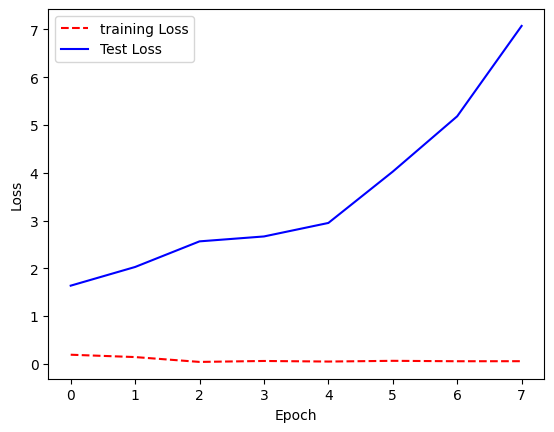

In [120]:
# Visualize loss history
epochs = range(0, epochs)
plt.plot(epochs, train_losses, "r--")
plt.plot(epochs, test_losses, "b-")
plt.legend(["training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

# 21.9 Reducing Overfitting with Weight Regularization

In [130]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [131]:
# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10, n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [132]:
# Set random seed
torch.manual_seed(0)
np.random.seed(0)


In [133]:
# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1,1)

In [139]:
# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
        torch.nn.Linear(10,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,1),
        torch.nn.Sigmoid(),
        )
        
    def forward(self, x):
        x = self.sequential(x)
        return x

In [140]:
# Initialize the neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=1e-4, weight_decay=1e-5)

In [141]:
# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

In [142]:
#Compile the modle using torch 2.0's optimizer
network = torch.compile(network)

In [143]:
# Train neural network
epochs = 100
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [144]:
# Evaluate neural network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:", test_accuracy.item())

Test Loss: 0.40943652391433716 	Test Accuracy: 0.9599999785423279


# 21.10 Reducing Overfitting with Early Stopping

In [147]:
from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [148]:
# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10, n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [149]:
# Set random seed
torch.manual_seed(0)
np.random.seed(0)

In [150]:
# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_train).float()
y_test = torch.from_numpy(target_train).float().view(-1,1)

In [151]:
# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self, layer_size_1=10, layer_size_2=10):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, layer_size_1),
            torch.nn.ReLU(),
            torch.nn.Linear(layer_size_1, layer_size_2),
            torch.nn.ReLU(),
            torch.nn.Linear(layer_size_2, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x
    
    config = {
        "layer_size_1": tune.sample_from(lambda _: 2 ** np.random.randomint(2,9)),
        "layer_size_2": tune.sample_from(lambda _: 2 ** np.random.randomint(2,9)),
        "lr": tune.loguniform(1e-4, 1e-1),
    }
    
scheduler =ASHAScheduler(
metric="loss",
mode="min",
max_t=1000,
grace_period=1,
reduction_factor=2)

reporter = CLIReporter(
parameter_columns=["layer_size_1", "layer_size_2", "lr"],metric_columns=["loss"])


In [152]:
# Train neural network
def train_model(config, epochs=3):
    network = SimpleNeuralnet(config["layer_size_1"], config["layer_size_2"])
    
    criterion = nn.BCELoss()
    optimizer = optim.SGD(network.parameters(), lr=config["lr"], momentum=0.9)
    
    train_data = TensorDataset(x_train, y_train)
    train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

    # Compile the model using torch 2.0's optimizer
    network = torch.compile(network)

    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = network(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            tune.report(loss=(loss.item()))

result = tune.run(
    train_model,
    resources_per_trial={"cpu": 2},
    config=config,
    num_samples=1,
    scheduler=scheduler,
    progress_reporter=reporter
)

best_trial = result.get_best_trial("loss", "min", "last")
print("Best trial config: {}".format(best_trial.config))
print("Best trial final validation loss: {}".format(
    best_trial.last_result["loss"]))

best_trained_model = SimpleNeuralNet(best_trial.config["layer_size_1"], best_trial.config["layer_size_2"])

NameError: name 'config' is not defined

# 21.11 Reducing Overfitting with Dropout

# 21.12 Saving Model Training Progress

# 21.13 Tuning Neural Networks

# 21.14 Visualizing Neural Networks